0.0


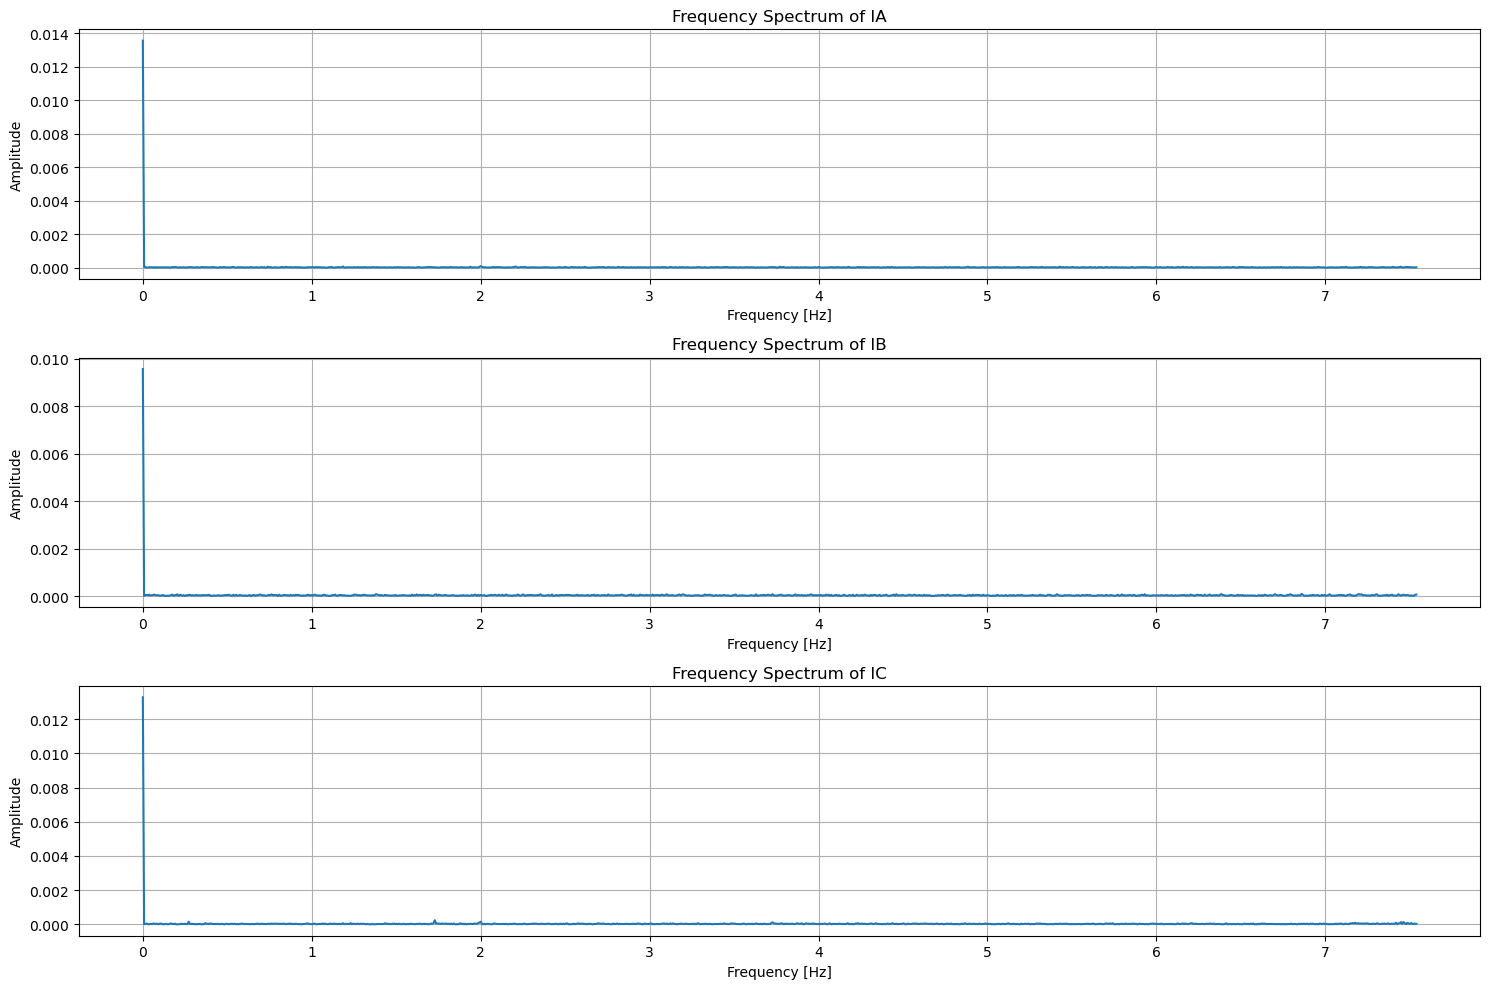

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSVファイルの読み込み
df = pd.read_csv('current.csv', header=None)  # ヘッダーなし
IA = df[0].values  # 1列目: IA
IB = df[1].values  # 2列目: IB
IC = df[2].values  # 3列目: IC

# サンプリング周波数（例: 1kHz）
fs = 50  # サンプリング周波数[Hz]
n = len(IA)  # データ点数

# FFTを計算する関数
def compute_fft(signal, fs):
    n = len(signal)
    fft_result = np.fft.fft(signal)  # FFT計算
    freq = np.fft.fftfreq(n, d=1/fs)  # 周波数軸を生成
    amp_spectrum = np.abs(fft_result) * 2 / n  # 振幅スペクトル
    return freq[:n//2], amp_spectrum[:n//2]  # 正の周波数のみ返す

# IA, IB, ICのスペクトルを計算
freq_IA, amp_IA = compute_fft(IA, fs)
freq_IB, amp_IB = compute_fft(IB, fs)
freq_IC, amp_IC = compute_fft(IC, fs)

max_index = np.argmax(amp_IA)
print(freq_IA[max_index])

# グラフのプロット
plt.figure(figsize=(15, 10))

# IAのスペクトル
plt.subplot(3, 1, 1)
plt.plot(freq_IA[:1000], amp_IA[:1000])
plt.title('Frequency Spectrum of IA')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.grid()

# IBのスペクトル
plt.subplot(3, 1, 2)
plt.plot(freq_IB[:1000], amp_IB[:1000])
plt.title('Frequency Spectrum of IB')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.grid()

# ICのスペクトル
plt.subplot(3, 1, 3)
plt.plot(freq_IC[:1000], amp_IC[:1000])
plt.title('Frequency Spectrum of IC')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.grid()

# グラフを表示
plt.tight_layout()
plt.show()

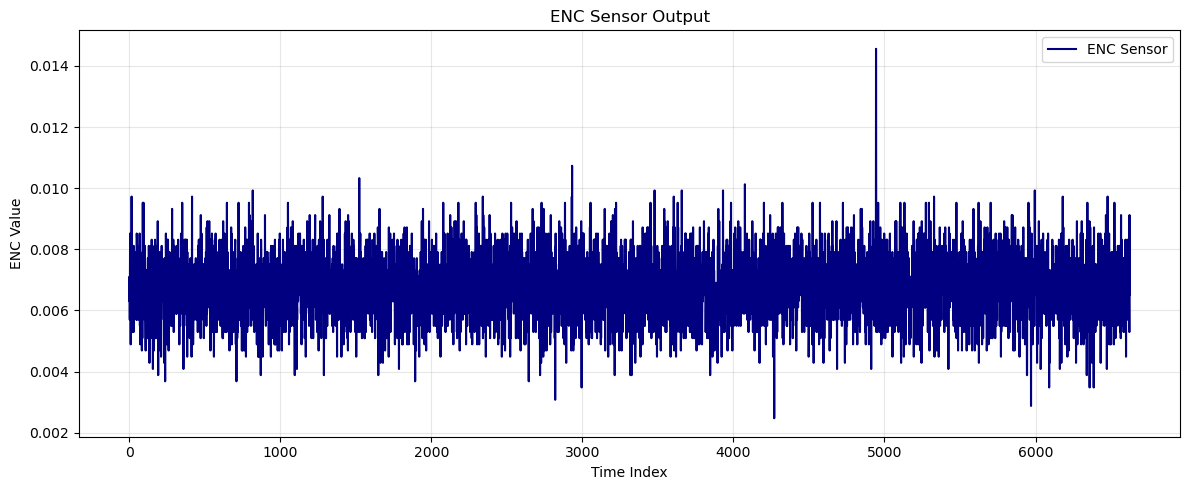

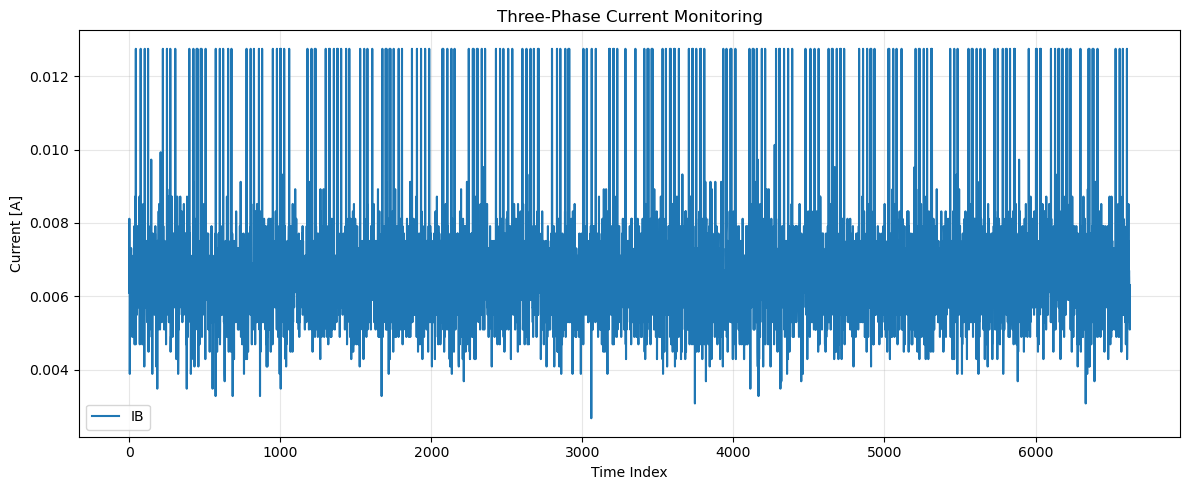

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV読み込み（4列構成）
data = pd.read_csv('current.csv', header=None, names=['ENC', 'IA', 'IB', 'IC'])

# ENCのプロット（1つ目のグラフ）
plt.figure(figsize=(12, 5))
plt.plot(data.index, data['ENC'], color='navy', linestyle='-', label='ENC Sensor')
plt.xlabel('Time Index')
plt.ylabel('ENC Value')
plt.title('ENC Sensor Output')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('enc_output.png', dpi=300)
plt.show()

# 3相電流のプロット（2つ目のグラフ）
plt.figure(figsize=(12, 5))
#plt.plot(data.index, data['IA'], label='IA', marker='', linestyle='-')
plt.plot(data.index, data['IB'], label='IB', marker='', linestyle='-')
#plt.plot(data.index, data['IC'], label='IC', marker='', linestyle='-')
#plt.plot(data.index, data['IA'] + data['IB'] + data['IC'], label='I_SUM', marker='', linestyle='-')
plt.xlabel('Time Index')
plt.ylabel('Current [A]')
plt.title('Three-Phase Current Monitoring')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('current_output.png', dpi=300)
plt.show()

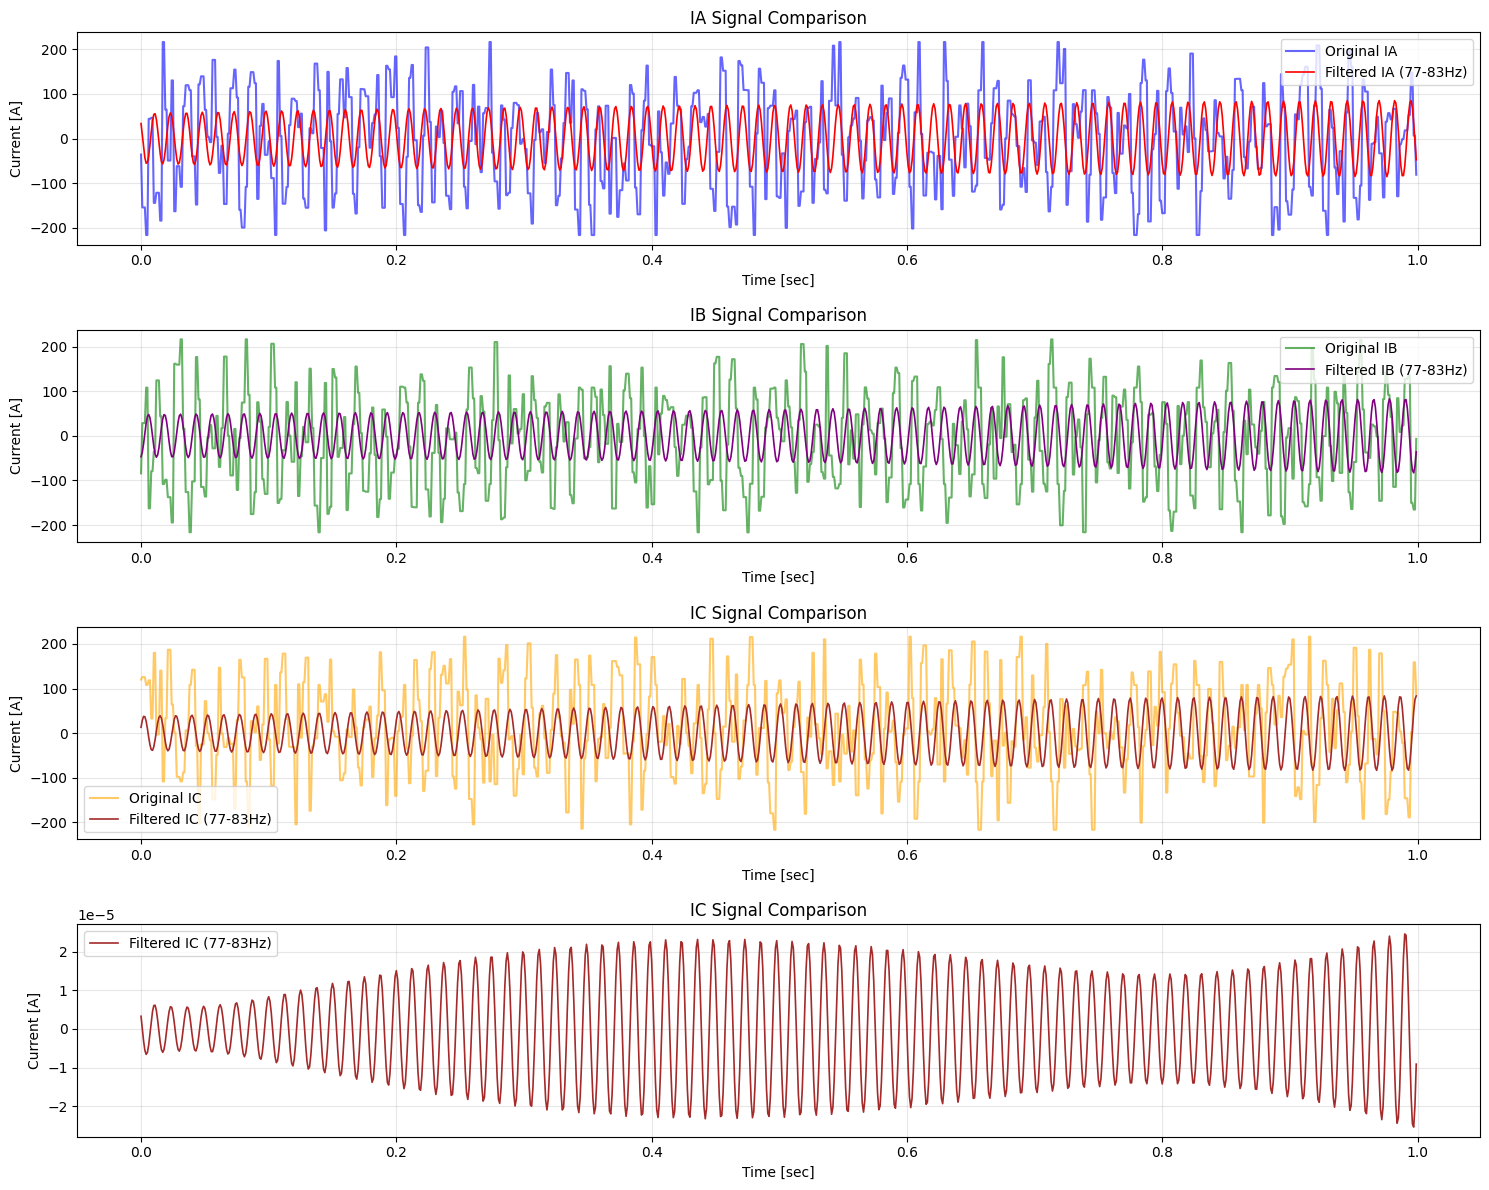

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSVファイル読み込みとデータ抽出
df = pd.read_csv('current.csv', header=None)
IA, IB, IC = df[1].values, df[2].values, df[3].values

# 信号処理パラメータ
fs = 1000  # サンプリング周波数
n = len(IA)
t = np.arange(n) / fs  # 時間軸を秒単位で生成

def bandpass_filter(signal, fs, lowcut, highcut):
    """周波数帯域フィルタリング関数"""
    fft = np.fft.fft(signal)
    freq = np.fft.fftfreq(n, d=1/fs)
    mask = (np.abs(freq) < lowcut) | (np.abs(freq) > highcut)
    fft[mask] = 0
    return np.fft.ifft(fft).real

# 70-90Hz帯域でフィルタリング
filtered_IA = bandpass_filter(IA, fs, 80, 81)
filtered_IB = bandpass_filter(IB, fs, 80, 81)
filtered_IC = bandpass_filter(IC, fs, 80, 81)

# プロット設定
plt.figure(figsize=(15, 12))

# IAの比較プロット
plt.subplot(4, 1, 1)
plt.plot(t[:1000], IA[:1000], label='Original IA', alpha=0.6, color='blue')
plt.plot(t[:1000], filtered_IA[:1000], label='Filtered IA (77-83Hz)', color='red', linewidth=1.2)
plt.title('IA Signal Comparison', fontsize=12)
plt.xlabel('Time [sec]', fontsize=10)
plt.ylabel('Current [A]', fontsize=10)
#plt.xlim(0, t[-1])
plt.legend()
plt.grid(alpha=0.3)

# IBの比較プロット
plt.subplot(4, 1, 2)
plt.plot(t[:1000], IB[:1000], label='Original IB', alpha=0.6, color='green')
plt.plot(t[:1000], filtered_IB[:1000], label='Filtered IB (77-83Hz)', color='purple', linewidth=1.2)
plt.title('IB Signal Comparison', fontsize=12)
plt.xlabel('Time [sec]', fontsize=10)
plt.ylabel('Current [A]', fontsize=10)
#plt.xlim(0, t[-1])
plt.legend()
plt.grid(alpha=0.3)

# ICの比較プロット
plt.subplot(4, 1, 3)
plt.plot(t[:1000], IC[:1000], label='Original IC', alpha=0.6, color='orange')
plt.plot(t[:1000], filtered_IC[:1000], label='Filtered IC (77-83Hz)', color='brown', linewidth=1.2)
plt.title('IC Signal Comparison', fontsize=12)
plt.xlabel('Time [sec]', fontsize=10)
plt.ylabel('Current [A]', fontsize=10)
#plt.xlim(0, t[-1])
plt.legend()
plt.grid(alpha=0.3)

# 和のプロット
plt.subplot(4, 1, 4)
plt.plot(t[:1000], filtered_IA[:1000] + filtered_IB[:1000] + filtered_IC[:1000], label='Filtered IC (77-83Hz)', color='brown', linewidth=1.2)
plt.title('IC Signal Comparison', fontsize=12)
plt.xlabel('Time [sec]', fontsize=10)
plt.ylabel('Current [A]', fontsize=10)
#plt.xlim(0, t[-1])
plt.legend()
plt.grid(alpha=0.3)

# グラフ表示調整
plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.show()

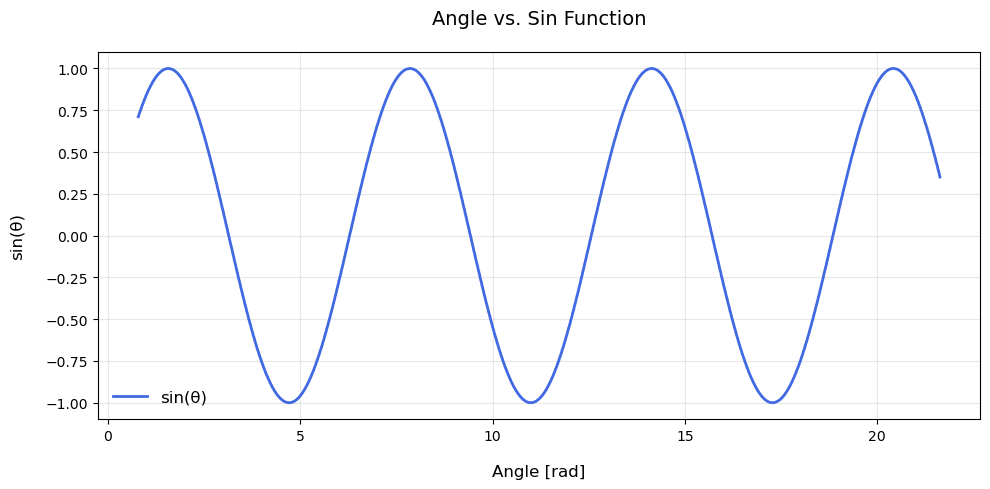

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV読み込み（列指定を追加）
data = pd.read_csv('data.csv', header=None, names=['Angle', 'Sin'])

# プロット設定改善
plt.figure(figsize=(10, 5))
plt.plot(data['Angle'], data['Sin'], 
         label='sin(θ)', 
         color='royalblue',
         linewidth=2)

plt.title('Angle vs. Sin Function', pad=20, fontsize=14)
plt.xlabel('Angle [rad]', labelpad=15, fontsize=12)
plt.ylabel('sin(θ)', labelpad=15, fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(frameon=False, fontsize=12)
plt.tight_layout()

plt.show()

In [4]:
import pandas as pd

# CSVファイルのリスト
csv_files = ['currentAB.csv', 'currentAC.csv', 'currentBA.csv','currentBC.csv', 'currentCA.csv', 'currentCB.csv']

# 各ファイルに対して処理を行う
for file in csv_files:
    df = pd.read_csv(file, header=None)
    column_means = df.mean(axis=0)
    print(f'File: {file}')
    print(column_means)
    print('-' * 40)

File: currentAB.csv
0   -261.282629
1    477.111064
2    -54.597787
dtype: float64
----------------------------------------
File: currentAC.csv
0   -232.550090
1     -1.815478
2    430.373060
dtype: float64
----------------------------------------
File: currentBA.csv
0    479.774827
1   -210.732823
2    -42.937231
dtype: float64
----------------------------------------
File: currentBC.csv
0     -1.483668
1   -204.179608
2    422.169861
dtype: float64
----------------------------------------
File: currentCA.csv
0    476.971343
1      1.615151
2   -281.849301
dtype: float64
----------------------------------------
File: currentCB.csv
0     -1.284566
1    442.752821
2   -280.307494
dtype: float64
----------------------------------------


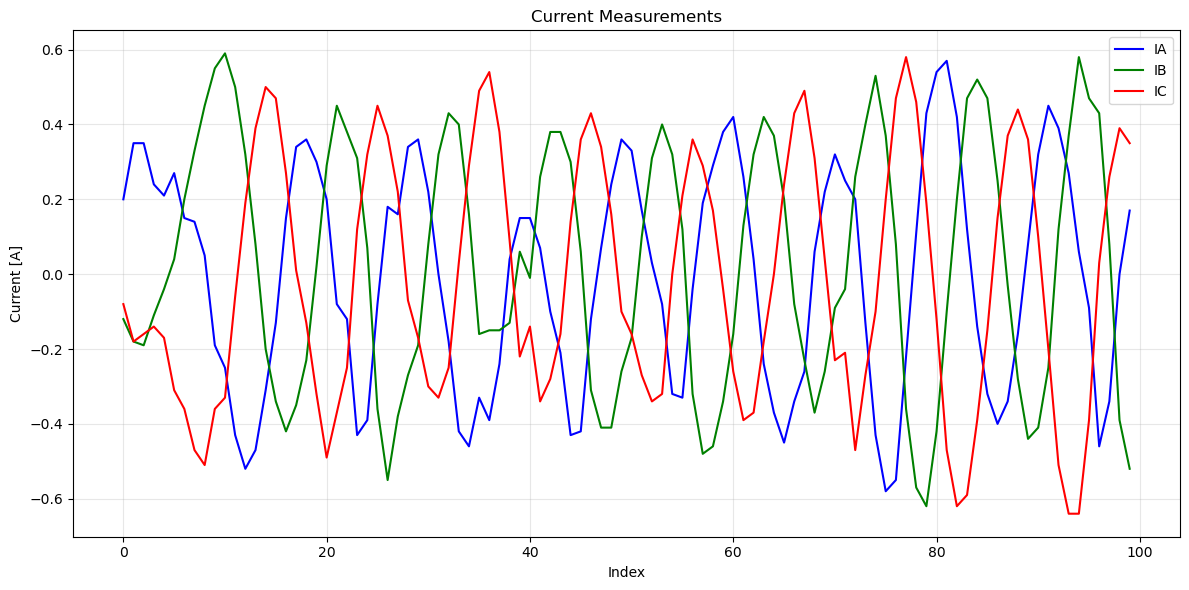

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルの読み込み
df = pd.read_csv('current.csv', header=None, names=['IA', 'IB', 'IC'])

# データ数を制限
df = df[:100]

# グラフのプロット
plt.figure(figsize=(12, 6))

# IAのプロット
plt.plot(df.index, df['IA'], label='IA', color='blue')

# IBのプロット
plt.plot(df.index, df['IB'], label='IB', color='green')

# ICのプロット
plt.plot(df.index, df['IC'], label='IC', color='red')

# グラフの設定
plt.xlabel('Index')
plt.ylabel('Current [A]')
plt.title('Current Measurements')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# グラフの表示
plt.show()

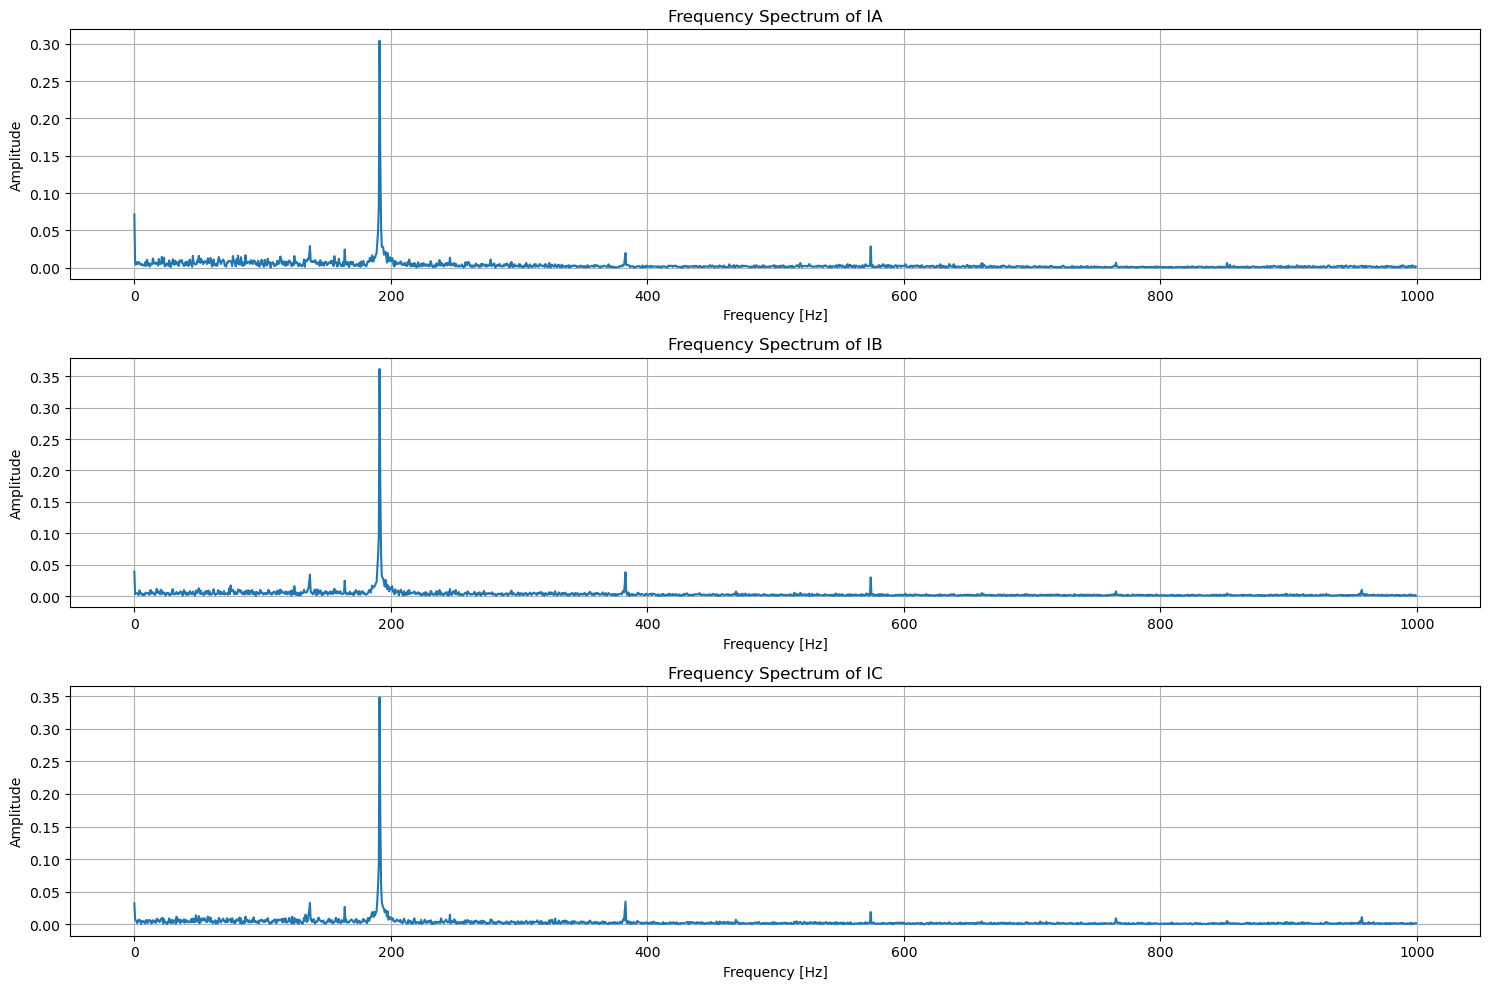

In [18]:
import numpy as np

import matplotlib.pyplot as plt

# CSVファイルの読み込み
df = pd.read_csv('current.csv', header=None, names=['IA', 'IB', 'IC'])

# サンプリング周波数（例: 1kHz）
fs = 2000  # サンプリング周波数[Hz]
n = len(df['IA'])  # データ点数

# FFTを計算する関数
def compute_fft(signal, fs):
    n = len(signal)
    fft_result = np.fft.fft(signal)  # FFT計算
    freq = np.fft.fftfreq(n, d=1/fs)  # 周波数軸を生成
    amp_spectrum = np.abs(fft_result) * 2 / n  # 振幅スペクトル
    return freq[:n//2], amp_spectrum[:n//2]  # 正の周波数のみ返す

# IA, IB, ICのスペクトルを計算
freq_IA, amp_IA = compute_fft(df['IA'], fs)
freq_IB, amp_IB = compute_fft(df['IB'], fs)
freq_IC, amp_IC = compute_fft(df['IC'], fs)

# グラフのプロット
plt.figure(figsize=(15, 10))

# IAのスペクトル
plt.subplot(3, 1, 1)
plt.plot(freq_IA, amp_IA)
plt.title('Frequency Spectrum of IA')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.grid()

# IBのスペクトル
plt.subplot(3, 1, 2)
plt.plot(freq_IB, amp_IB)
plt.title('Frequency Spectrum of IB')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.grid()

# ICのスペクトル
plt.subplot(3, 1, 3)
plt.plot(freq_IC, amp_IC)
plt.title('Frequency Spectrum of IC')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.grid()

# グラフを表示
plt.tight_layout()
plt.show()

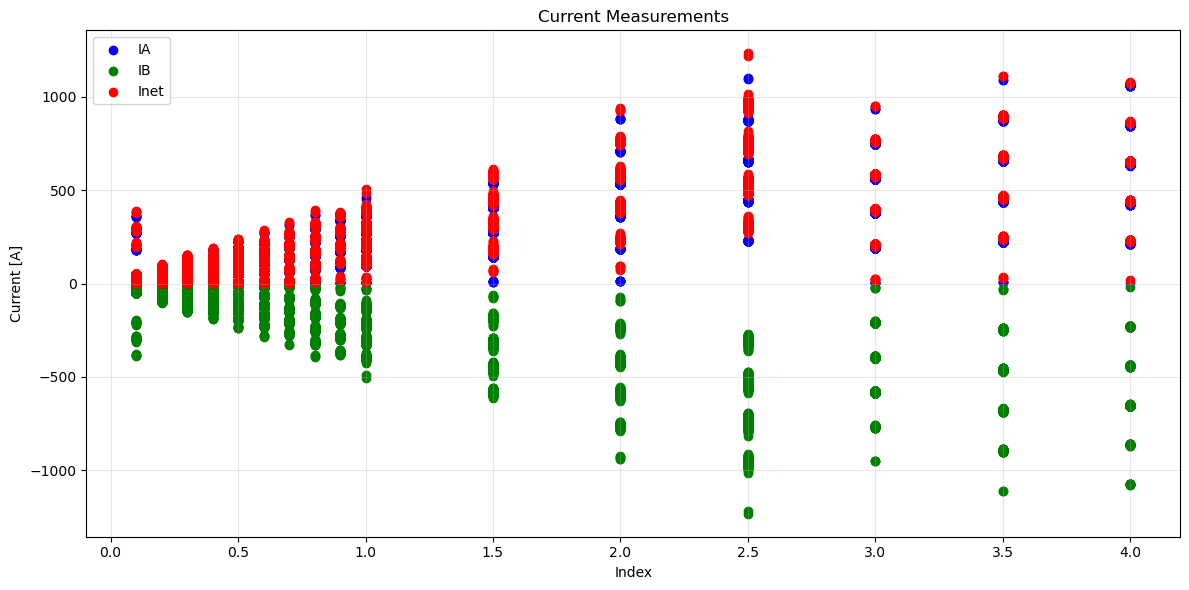

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルの読み込み
df = pd.read_csv('current.csv', header=None, names=['Itrue', 'IA', 'IB', 'IC', "Inet"])

# グラフのプロット
plt.figure(figsize=(12, 6))

# IAのプロット
plt.scatter(df['Itrue'], df['IA'], label='IA', color='blue')

# IBのプロット
plt.scatter(df['Itrue'], df['IB'], label='IB', color='green')

# ICのプロット
plt.scatter(df['Itrue'], df['Inet'], label='Inet', color='red')

# グラフの設定
plt.xlabel('Index')
plt.ylabel('Current [A]')
plt.title('Current Measurements')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# グラフの表示
plt.show()

       Itrue     IA     IB  IC   Inet
0        0.1  271.2 -301.2 NaN  301.2
1        0.1  359.0 -378.9 NaN  378.9
2        0.1  270.8 -290.5 NaN  290.5
3        0.1  182.3 -197.0 NaN  197.0
4        0.1  270.1 -291.1 NaN  291.1
...      ...    ...    ...  ..    ...
26495    4.0  845.9 -860.5 NaN  860.5
26496    4.0  847.3 -861.5 NaN  861.5
26497    4.0  636.0 -650.3 NaN  650.3
26498    4.0  426.4 -440.9 NaN  440.9
26499    4.0  637.9 -653.0 NaN  653.0

[26500 rows x 5 columns]


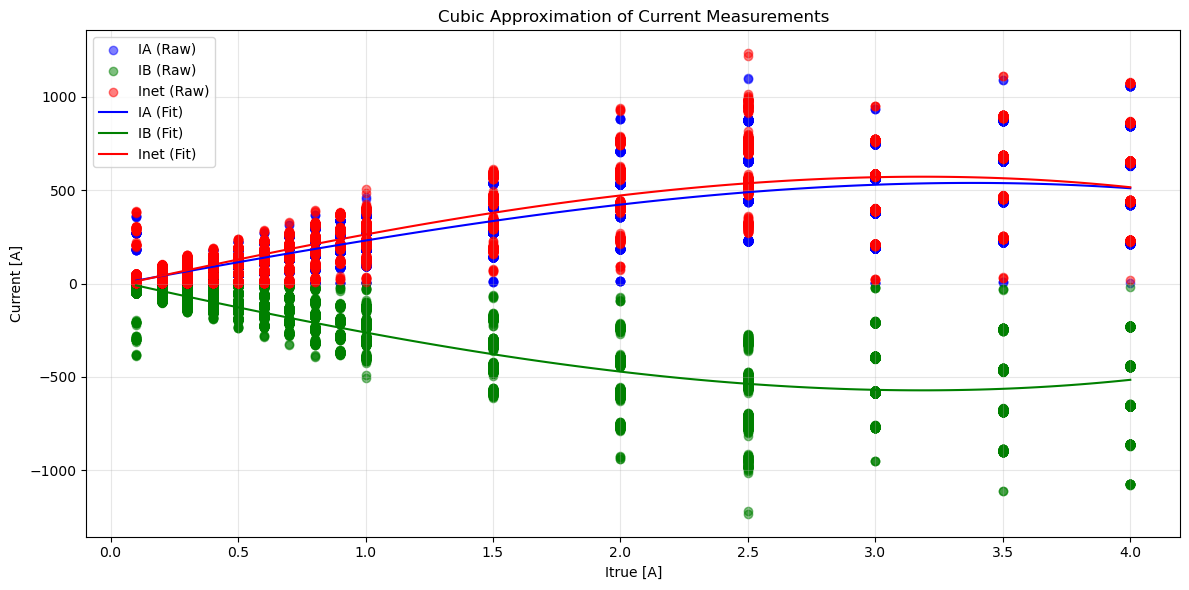

IA approximation coefficients: [ -6.5226603   -3.94500661 250.10997542  -9.29304934]
IB approximation coefficients: [   6.52001601   16.98400837 -306.39420218   20.55972395]
Inet approximation coefficients: [ -6.67234888 -15.73882765 303.26801952 -18.25527628]


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSVファイルの読み込み
df = pd.read_csv("current.csv", header=None, names=['Itrue', 'IA', 'IB', 'IC', "Inet"])

print(df)

# 3次多項式でフィッティング
coeffs_IA = np.polyfit(df['Itrue'], df['IA'], 3)
coeffs_IB = np.polyfit(df['Itrue'], df['IB'], 3)
coeffs_INET = np.polyfit(df['Itrue'], df['Inet'], 3)

# 近似式を作成
poly_IA = np.poly1d(coeffs_IA)
poly_IB = np.poly1d(coeffs_IB)
poly_INET = np.poly1d(coeffs_INET)

# 近似曲線をプロット用に計算
Itrue_fit = np.linspace(df['Itrue'].min(), df['Itrue'].max(), 100)
IA_fit = poly_IA(Itrue_fit)
IB_fit = poly_IB(Itrue_fit)
Inet_fit = poly_INET(Itrue_fit)

# グラフの描画
plt.figure(figsize=(12, 6))

# 散布図
plt.scatter(df['Itrue'], df['IA'], label='IA (Raw)', color='blue', alpha=0.5)
plt.scatter(df['Itrue'], df['IB'], label='IB (Raw)', color='green', alpha=0.5)
plt.scatter(df['Itrue'], df['Inet'], label='Inet (Raw)', color='red', alpha=0.5)

# 近似曲線
plt.plot(Itrue_fit, IA_fit, label='IA (Fit)', color='blue')
plt.plot(Itrue_fit, IB_fit, label='IB (Fit)', color='green')
plt.plot(Itrue_fit, Inet_fit, label='Inet (Fit)', color='red')

# グラフの設定
plt.xlabel('Itrue [A]')
plt.ylabel('Current [A]')
plt.title('Cubic Approximation of Current Measurements')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# グラフの表示
plt.show()

# 近似式の係数を出力
print("IA approximation coefficients:", coeffs_IA)
print("IB approximation coefficients:", coeffs_IB)
print("Inet approximation coefficients:", coeffs_INET)

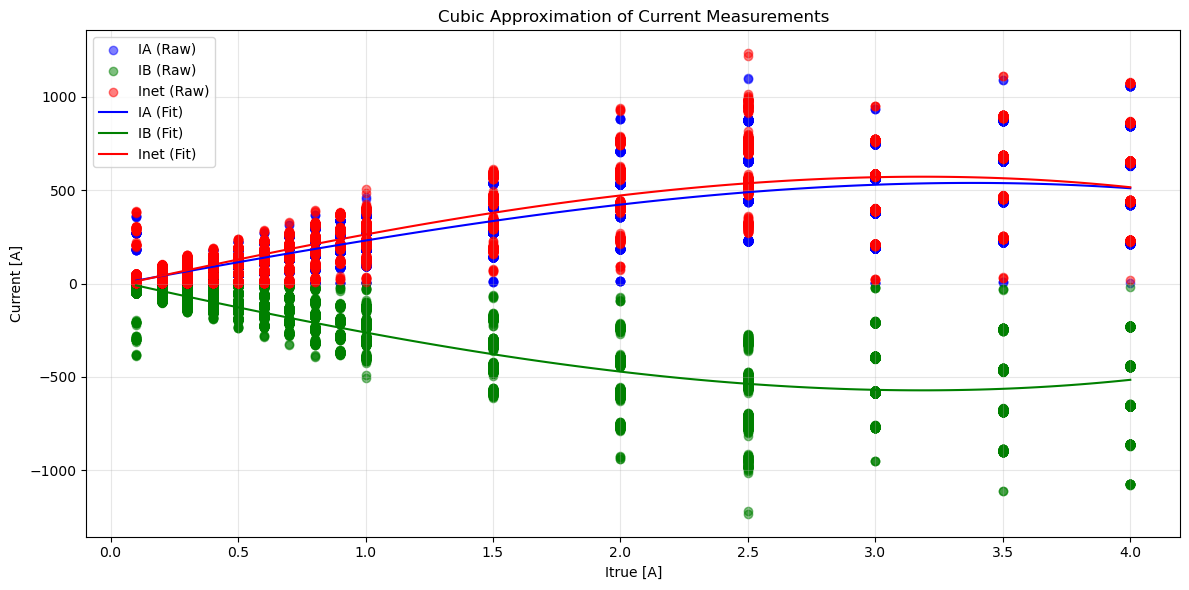

IA approximation coefficients: [ -6.5226603   -3.94500661 250.10997542  -9.29304934]
IB approximation coefficients: [   6.52001601   16.98400837 -306.39420218   20.55972395]
Inet approximation coefficients: [ -6.67234888 -15.73882765 303.26801952 -18.25527628]


TypeError: float() argument must be a string or a real number, not 'Polynomial'

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

def cubic_fit(csv_filename):
    # CSVファイルの読み込み
    df = pd.read_csv(csv_filename, header=None, names=['Itrue', 'IA', 'IB', 'IC', "Inet"])
    
    # 3次多項式でフィッティング
    coeffs_IA = np.polyfit(df['Itrue'], df['IA'], 3)
    coeffs_IB = np.polyfit(df['Itrue'], df['IB'], 3)
    coeffs_INET = np.polyfit(df['Itrue'], df['Inet'], 3)
    
    # 近似式を作成
    poly_IA = np.poly1d(coeffs_IA)
    poly_IB = np.poly1d(coeffs_IB)
    poly_INET = np.poly1d(coeffs_INET)
    
    # 近似曲線をプロット用に計算
    Itrue_fit = np.linspace(df['Itrue'].min(), df['Itrue'].max(), 100)
    IA_fit = poly_IA(Itrue_fit)
    IB_fit = poly_IB(Itrue_fit)
    Inet_fit = poly_INET(Itrue_fit)
    
    # グラフの描画
    plt.figure(figsize=(12, 6))
    
    # 散布図
    plt.scatter(df['Itrue'], df['IA'], label='IA (Raw)', color='blue', alpha=0.5)
    plt.scatter(df['Itrue'], df['IB'], label='IB (Raw)', color='green', alpha=0.5)
    plt.scatter(df['Itrue'], df['Inet'], label='Inet (Raw)', color='red', alpha=0.5)
    
    # 近似曲線
    plt.plot(Itrue_fit, IA_fit, label='IA (Fit)', color='blue')
    plt.plot(Itrue_fit, IB_fit, label='IB (Fit)', color='green')
    plt.plot(Itrue_fit, Inet_fit, label='Inet (Fit)', color='red')
    
    # グラフの設定
    plt.xlabel('Itrue [A]')
    plt.ylabel('Current [A]')
    plt.title('Cubic Approximation of Current Measurements')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    
    # グラフの表示
    plt.show()
    
    # 近似式の係数を出力
    print("IA approximation coefficients:", coeffs_IA)
    print("IB approximation coefficients:", coeffs_IB)
    print("Inet approximation coefficients:", coeffs_INET)

def inverse_cubic_fit(coeffs, current_values):
    # 近似式の逆関数を求める（数値的に解く）
    poly = Polynomial(coeffs[::-1])  # np.polyfitは降べきの係数を返すため逆順にする
    Itrue_solutions = [np.roots(poly - value) for value in current_values]
    return [sol[np.isreal(sol)].real[0] for sol in Itrue_solutions]  # 実数解のみ取得

# スクリプトの実行
if __name__ == "__main__":
    cubic_fit('current.csv')
    
    # 逆近似の例（IA, IB, Inet から Itrue を求める）
    sample_currents = [1.0, 2.0, 3.0]  # 例として適当な電流値
    print("Estimated Itrue for IA:", inverse_cubic_fit(coeffs_IA, sample_currents))
    print("Estimated Itrue for IB:", inverse_cubic_fit(coeffs_IB, sample_currents))
    print("Estimated Itrue for Inet:", inverse_cubic_fit(coeffs_INET, sample_currents))


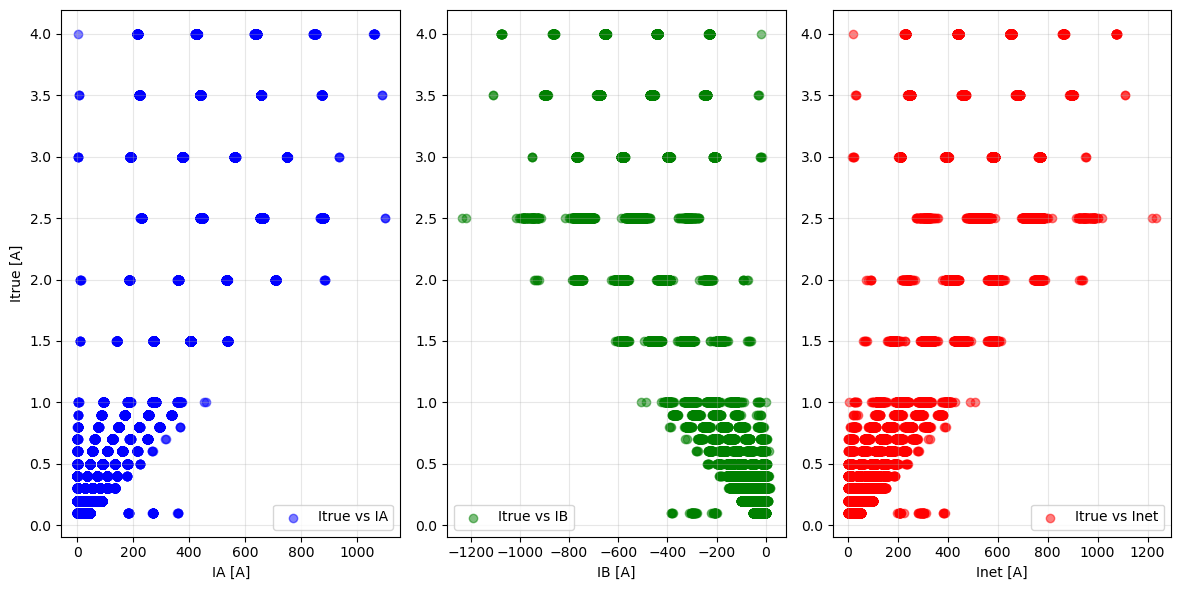

Itrue approximation from IA coefficients: [-7.44754808e-09  4.62723461e-06  5.04407846e-03  2.61110853e-02]
Itrue approximation from IB coefficients: [ 7.47774638e-09  5.33888847e-06 -4.39435823e-03  2.72798895e-02]
Itrue approximation from Inet coefficients: [-7.36752691e-09  5.15858026e-06  4.48274357e-03  1.47552424e-02]
Estimated Itrue for IA: [0.03115978 0.03621769 0.04128476]
Estimated Itrue for IB: [0.02289088 0.01851259 0.01414507]
Estimated Itrue for Inet: [0.01924314 0.0237413  0.0282497 ]


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

def cubic_fit(csv_filename):
    # CSVファイルの読み込み
    df = pd.read_csv(csv_filename, header=None, names=['Itrue', 'IA', 'IB', 'IC', "Inet"])
    
    # 3次多項式でフィッティング (Itrue = f(IA), f(IB), f(Inet))
    coeffs_IA_inv = np.polyfit(df['IA'], df['Itrue'], 3)
    coeffs_IB_inv = np.polyfit(df['IB'], df['Itrue'], 3)
    coeffs_INET_inv = np.polyfit(df['Inet'], df['Itrue'], 3)
    
    # グラフの描画
    plt.figure(figsize=(12, 6))
    
    # 散布図を作成
    plt.subplot(1, 3, 1)
    plt.scatter(df['IA'], df['Itrue'], label='Itrue vs IA', color='blue', alpha=0.5)
    plt.xlabel('IA [A]')
    plt.ylabel('Itrue [A]')
    plt.legend()
    plt.grid(alpha=0.3)
    
    plt.subplot(1, 3, 2)
    plt.scatter(df['IB'], df['Itrue'], label='Itrue vs IB', color='green', alpha=0.5)
    plt.xlabel('IB [A]')
    plt.legend()
    plt.grid(alpha=0.3)
    
    plt.subplot(1, 3, 3)
    plt.scatter(df['Inet'], df['Itrue'], label='Itrue vs Inet', color='red', alpha=0.5)
    plt.xlabel('Inet [A]')
    plt.legend()
    plt.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 近似式の係数を出力
    print("Itrue approximation from IA coefficients:", coeffs_IA_inv)
    print("Itrue approximation from IB coefficients:", coeffs_IB_inv)
    print("Itrue approximation from Inet coefficients:", coeffs_INET_inv)
    
    return coeffs_IA_inv, coeffs_IB_inv, coeffs_INET_inv

def estimate_Itrue(coeffs, measured_currents):
    return np.polyval(coeffs, measured_currents)

# スクリプトの実行
if __name__ == "__main__":
    coeffs_IA_inv, coeffs_IB_inv, coeffs_INET_inv = cubic_fit('current.csv')
    
    # 近似式を使って Itrue を推定
    sample_currents = [1.0, 2.0, 3.0]  # 例として適当な電流値
    print("Estimated Itrue for IA:", estimate_Itrue(coeffs_IA_inv, sample_currents))
    print("Estimated Itrue for IB:", estimate_Itrue(coeffs_IB_inv, sample_currents))
    print("Estimated Itrue for Inet:", estimate_Itrue(coeffs_INET_inv, sample_currents))


/var/folders/21/b7h77n793wn631rw9818n7w40000gn/T/ipykernel_6766/2814778718.py:17: UserWarning: Glyph 38651 (\N{CJK UNIFIED IDEOGRAPH-96FB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/21/b7h77n793wn631rw9818n7w40000gn/T/ipykernel_6766/2814778718.py:17: UserWarning: Glyph 27969 (\N{CJK UNIFIED IDEOGRAPH-6D41}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/21/b7h77n793wn631rw9818n7w40000gn/T/ipykernel_6766/2814778718.py:17: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38651 (\N{CJK UNIFIED IDEOGRAPH-96FB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27969 (\N{CJK UNIFIED IDEOGRAPH-6D41}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, *

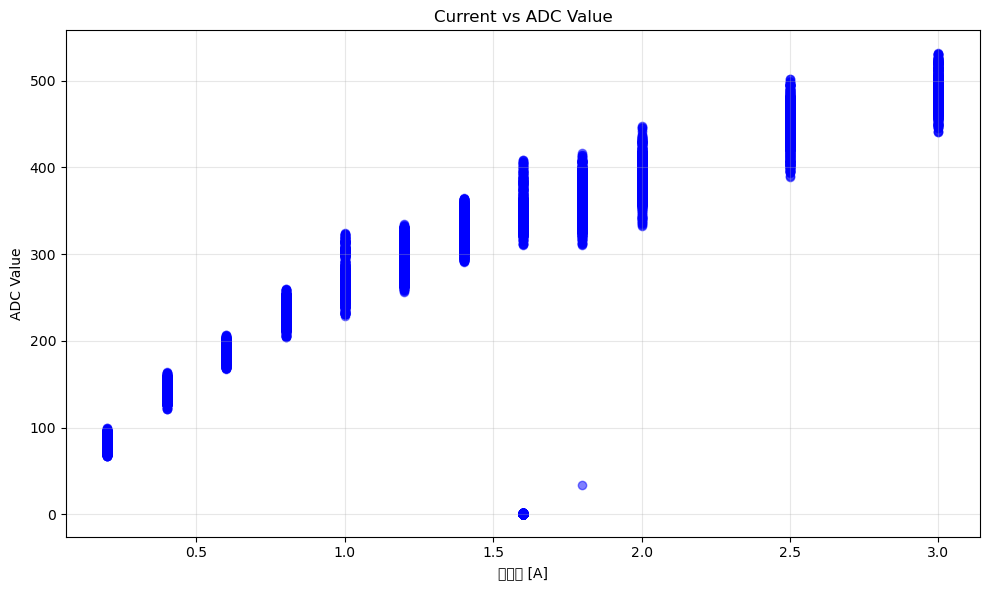

In [5]:
import pandas as pd

import matplotlib.pyplot as plt

# CSVファイルの読み込み
df = pd.read_csv('current.csv', header=None)

# 散布図のプロット
plt.figure(figsize=(10, 6))
plt.scatter(df[0], df[1], color='blue', alpha=0.5)

# グラフの設定
plt.xlabel('電流値 [A]')
plt.ylabel('ADC Value')
plt.title('Current vs ADC Value')
plt.grid(alpha=0.3)
plt.tight_layout()

# グラフの表示
plt.show()

/var/folders/21/b7h77n793wn631rw9818n7w40000gn/T/ipykernel_6766/2327631804.py:18: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(poly5, x, y)


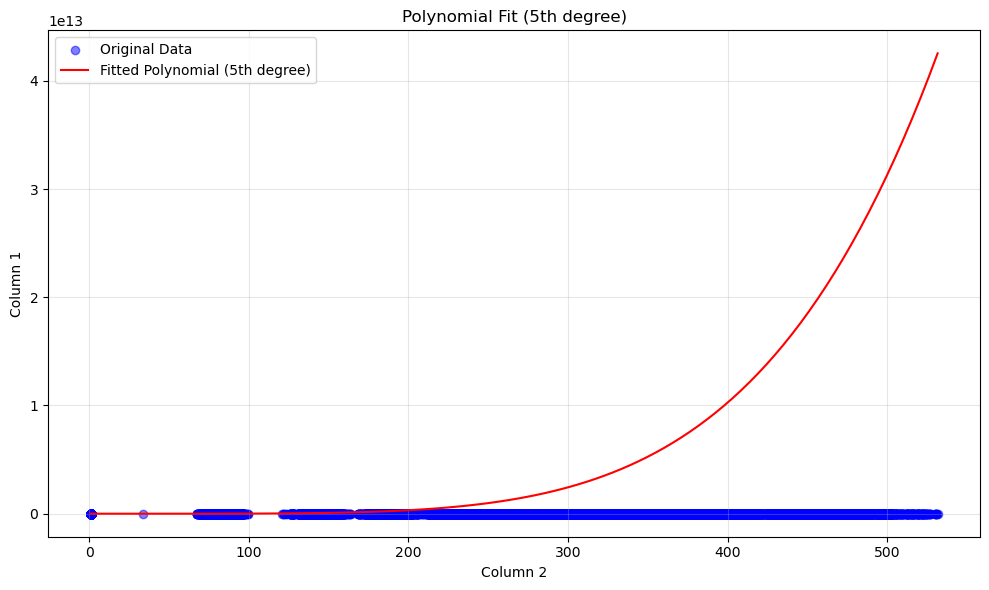

Fitted Parameters: [-2.12099827e-08  2.80597756e-05 -3.64586787e-03  3.94054772e-01
  1.00000000e+00  1.00000000e+00]


/var/folders/21/b7h77n793wn631rw9818n7w40000gn/T/ipykernel_6766/2443905365.py:24: OptimizeWarning: Covariance of the parameters could not be estimated
  params, cov = optimize.curve_fit(cubic_fit, x, y)


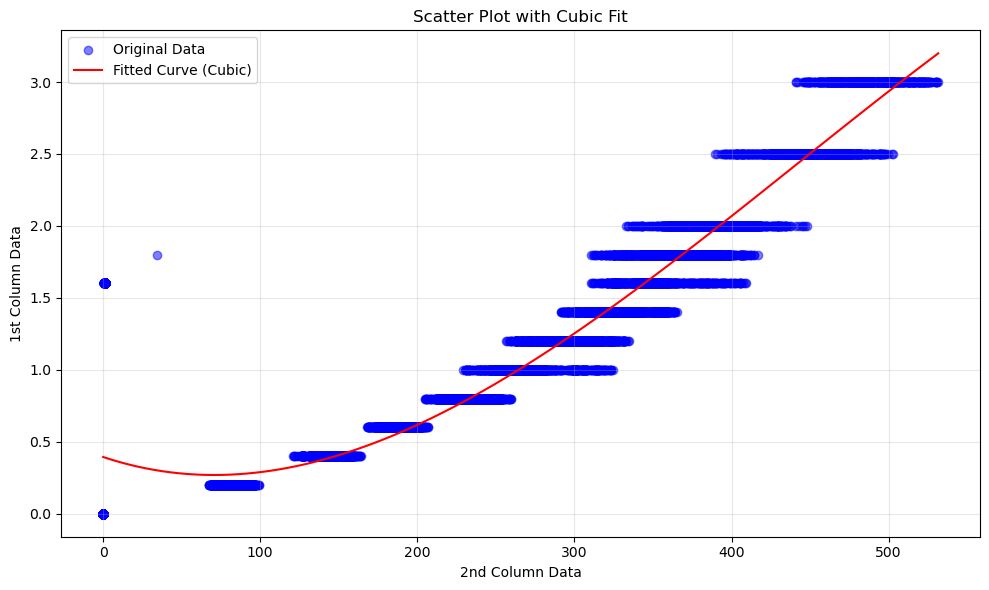

In [35]:
import pandas as pd
import numpy as np

from scipy import optimize

import matplotlib.pyplot as plt

# CSVファイルの読み込み
df = pd.read_csv('current.csv', header=None)

#infやNanを除去
df = df.dropna()


# 2列目の値をx、1列目の値をyとする
x = df[1].to_numpy(dtype=float)
y = df[0].to_numpy(dtype=float)

# フィッティング関数の定義
def cubic_fit(x, a, b, c, d, e, f):
    return a * x ** 3 + b * x ** 2 + c * x + d

# フィッティングの実行
params, cov = optimize.curve_fit(cubic_fit, x, y)

# フィッティング結果の表示
print('Fitted Parameters:', params)

# フィッティング曲線の計算
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = cubic_fit(x_fit, *params)

# 散布図のプロット
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Original Data', color='blue', alpha=0.5)
plt.plot(x_fit, y_fit, label='Fitted Curve (Cubic)', color='red')

# グラフの設定
plt.xlabel('2nd Column Data')
plt.ylabel('1st Column Data')
plt.title('Scatter Plot with Cubic Fit')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# グラフの表示
plt.show()

In [1]:
import pandas as pd

# CSVファイルのリスト
csv_files = ['current_0.5A.csv', 'current_1A.csv', 'current_2A.csv', 'current_2.5A.csv']

# 各ファイルに対して処理を行う
for file in csv_files:
    df = pd.read_csv(file, header=None)
    column_mean = df[0].mean()
    print(f'File: {file}')
    print(f'Mean of 1st column: {column_mean}')
    print('-' * 40)

File: current_0.5A.csv
Mean of 1st column: 358.323186344239
----------------------------------------
File: current_1A.csv
Mean of 1st column: 585.6599627560522
----------------------------------------


TypeError: Could not convert string '860.1868.8878.1861.8856.8867.2860.2852.4852.1847.7839.6835.2832.9831.1829.1823.6820.2822.0820.8821.1826.7829.5832.0834.6838.4848.9856.7855.7863.6881.8868.8864.9883.0885.8874.5878.4895.7881.0871.5883.0886.7868.4864.4877.5862.3851.2855.8853.3843.8843.2853.4845.6843.7850.3849.9846.5846.6852.5846.9846.6853.0855.0850.6856.3871.1863.2863.8883.7884.0875.4882.6897.2877.4869.9884.2880.8869.8870.3877.7861.1854.4856.5851.1844.2842.0837.4831.9827.7822.5823.4823.5822.2825.2828.3830.2834.3838.2843.2855.3857.4858.9871.4878.2868.9870.4891.2882.9873.8883.6892.7872.3868.2887.2876.8863.2867.8872.4854.5848.1854.3848.0841.2843.9844.9838.9838.2842.9841.6839.0841.8843.3842.0844.6852.5848.2848.7861.0866.2863.6871.8887.8874.7871.3887.2885.9873.2876.0886.4868.9859.5864.9859.6849.4848.0847.8839.1835.7832.8828.2828.1826.5825.6828.8829.1824.5828.1830.4833.8841.1842.8849.8856.3852.4857.3879.0873.0866.5881.9890.0875.6876.3897.0887.3874.1881.4891.4868.7861.0872.9862.3848.8848.9852.3839.8836.1839.5834.8829.7833.3838.0836.0836.4842.3840.6843.4852.0857.4854.0857.0871.4863.7862.0875.0875.3862.4865.4883.4868.9861.2871.2867.3855.5854.3864.2848.9842.4843.8838.5832.2831.1833.4830.6829.9828.3828.8830.1829.1832.5837.0840.1841.2842.3844.6853.2857.1856.7868.9878.2867.5868.8893.3889.6877.8885.4898.3879.5871.6887.3874.2856.3856.6864.3848.7843.0849.5844.7838.7841.5852.1846.8845.5850.5851.5850.8851.7849.4847.1848.7855.3851.0851.0860.7865.5860.5865.6884.7872.8867.1879.2879.6864.4864.3878.5866.1859.2867.4862.8852.0850.8855.9844.7840.4837.0831.5829.8825.4822.6825.1824.4819.0827.5832.7836.7842.2844.2852.1860.9858.9863.9882.6877.7870.2881.3891.2873.5870.8893.1884.2871.5879.1889.9869.0863.0876.3873.5862.6861.5864.5853.4851.1856.2854.8849.4847.6843.3839.2839.1845.2841.0839.4845.1846.6842.3848.2867.9860.0857.5870.2873.1861.3862.8878.2862.2854.3865.4865.9855.3855.6867.2853.5850.7855.6851.3845.6841.6836.6830.6826.9818.7820.5819.6814.0813.6817.3820.9825.9834.7841.8855.0858.0858.7871.3880.5871.8873.5895.1887.0877.3886.4894.7873.4868.8888.9879.6865.4870.3876.6857.3850.1857.1852.4846.1846.5843.6837.3835.7838.3840.5840.9844.8846.9846.2848.9857.4854.2855.1867.3872.4868.9876.2890.5878.2875.7892.0889.9876.9879.0885.2865.9856.3862.5857.2848.6849.3849.8839.8834.9833.8830.5830.5830.1828.1829.9828.5823.2830.1834.7838.5843.9845.3852.2861.2858.9865.5888.0879.9873.6888.5894.9880.9881.3899.0887.3874.8882.9891.2868.7863.1877.7869.8857.8859.1860.9850.9848.5853.0849.7846.4847.7845.1842.4841.8845.7840.7838.1842.1844.0839.3845.0859.9851.5851.7867.7868.2860.0866.7882.0866.4861.2874.5871.7861.1860.4864.6850.9847.2849.6845.5841.3837.5829.8826.1822.3816.6822.0823.5821.6823.3828.3833.0840.5844.3850.9862.9858.4856.3868.4873.8861.3865.6887.6877.8867.3880.2886.5869.4868.8887.1874.2859.8864.8870.2856.0853.1863.7855.2848.5850.1848.7843.9844.1847.9843.6842.1842.2843.4841.3843.3851.4846.9847.2856.5861.6858.3866.2877.7866.8867.1886.3882.5870.5875.7883.4864.4858.4866.6857.0847.8847.7846.4839.0838.2837.9833.4830.8826.5825.6828.3827.5821.6826.2828.3831.7839.8844.6855.8862.8859.6864.9885.2875.0871.2887.1889.5874.0874.8892.2877.7864.7874.4878.0858.3854.8870.0863.2855.1859.4859.3851.7852.4861.1853.4849.1853.4851.2845.9845.9850.5843.8841.3847.6850.8846.5851.6864.6857.9858.7876.2876.2869.5877.1889.2870.9865.8878.4873.5860.0858.6861.7847.4841.1841.8836.9831.6830.3827.0827.2827.4823.2827.5830.4828.6830.6834.8836.3843.0849.7856.1867.2864.2863.7876.7884.5876.9882.3896.0881.6873.3887.3885.9869.2870.5883.9866.8856.4865.1864.9852.3850.2862.5851.3844.8848.1845.8838.9839.4844.3837.0836.3839.9841.1840.3846.5855.5851.0852.2867.6871.0862.7870.3881.4866.5863.4880.7872.4858.5862.9871.3855.3849.9859.0852.8843.3843.1843.9835.8833.4832.0828.4826.8823.3822.6825.1823.8816.2820.6822.0821.7827.4831.9841.2848.7848.5857.3881.6872.5867.6885.5889.0874.1875.9892.6878.2865.4874.1879.3860.3856.7871.5861.9853.5857.1856.5847.8846.8852.0843.8841.1844.8845.8839.6838.2842.0837.2836.7843.1846.0841.4846.6855.4848.4849.7865.2861.5854.7865.6878.7863.7860.5875.0872.3863.2866.1870.4857.1852.3855.1847.5840.5835.1829.1827.1825.6821.2825.6826.3822.6825.8832.5837.0842.2844.3847.5855.9854.4856.8872.2876.4867.9876.2893.6881.7876.0893.2887.8870.4870.7884.5866.5854.9861.7857.7845.8844.7856.0842.7839.0843.3839.1835.4837.4843.4841.5842.4846.4848.7845.6847.8853.4849.8852.5866.4863.4858.7867.6871.4861.2864.8884.2871.4860.3867.1868.2854.7851.7863.0849.6841.3842.1837.6830.9828.4825.0821.2820.6816.5816.3818.7818.0822.8829.0832.5833.9837.5840.4849.3857.5857.7866.7873.0862.5863.8889.3890.2882.4892.3902.7882.5877.0894.7887.9872.5872.0875.9856.9848.4853.4851.7844.5844.6844.1837.7836.5838.4837.0836.7839.0839.7838.9842.3851.8847.8847.2858.5864.1859.5866.1880.3867.7863.4878.2875.2859.8861.6872.2853.9845.3850.1845.2837.1836.9840.7834.4833.2831.9829.7827.6823.1821.8825.7826.3821.6828.5831.3832.9838.7842.4851.2856.7853.4857.1873.3862.6857.5872.9878.4868.8872.7891.8877.1867.4880.0886.4869.1865.5878.7865.7854.1856.9855.2844.5840.8844.8836.2834.1838.0839.5838.5839.3845.2842.4843.6852.8857.4853.2859.6868.0857.8858.2875.4872.1863.4871.4880.0861.9856.7871.4868.4859.9863.3867.1855.9851.9853.9847.1842.1839.4833.8829.1824.5816.6821.1823.3821.7825.3830.1833.2838.1840.4845.5855.9851.4851.2865.7871.6864.5871.6889.0878.5873.6890.8886.1870.4871.2886.0868.6858.2865.4861.9849.9848.1860.7849.4844.4846.5842.2836.0838.4847.1842.3842.8848.6850.1848.1854.4863.5857.6858.6873.0872.9865.0872.3880.2866.3864.5881.6872.8859.6863.8870.5853.6849.1858.4848.1841.0843.8843.2837.0834.7831.7831.9832.6829.9828.9830.4826.9826.4833.0836.3837.7839.8841.6848.6857.4854.5860.9873.8862.0861.2880.6885.7875.3880.8897.9882.3875.6891.0889.8871.1868.8880.1866.2856.1857.3852.4843.1842.2849.2839.3836.8838.1836.8834.1836.3843.1839.5839.4845.9845.6843.6853.8862.1853.1854.6872.3866.5860.4873.0885.7868.2864.1880.5874.9863.1864.7865.2851.6847.0850.2842.9837.9832.1825.9825.6823.8818.5823.6824.7821.2824.4828.7834.0841.5846.7853.7866.2861.2862.0877.0882.6874.1882.2899.4885.4878.8895.7893.7877.9879.6893.2875.5865.3873.2869.9857.6855.7867.1855.3849.2849.5845.4840.4840.2843.7841.8843.1845.9845.2843.6847.9854.9853.3857.5873.0869.5864.2872.3876.5867.2870.5888.0875.5864.8872.1871.4856.3853.0864.4849.4842.0843.6838.3832.6830.0828.7825.7824.8821.0822.2824.1823.5825.0829.3834.0838.2842.0844.4853.4859.7859.3868.8878.8867.6866.3886.5886.1874.6881.4891.3870.1862.4877.5868.6853.1855.3862.0847.4842.3848.3846.0839.0839.2841.2835.6834.2836.5836.9836.1839.3840.7840.2843.9854.2850.3849.4860.7866.6862.7868.1882.8870.1866.4880.6876.5861.7862.7872.8856.6850.3857.3852.7843.2842.6847.1839.4837.8836.0831.3827.5821.0819.5825.5826.2820.8827.8829.7831.0836.7840.5848.7854.6851.7855.9872.7864.9862.0878.7884.0871.3875.0892.6876.6865.7877.2880.2861.5856.8870.4861.6851.9855.4853.1844.3842.9849.0841.3838.4841.5840.5837.9839.7846.5843.9846.3856.4856.5851.3' to numeric